# Prophet 설치

In [1]:
import pandas as pd
from google.colab import drive

drive.mount('/content/gdriv')
data_path = "/content/gdriv/My Drive/Colab Notebooks/study/stackoverflow" 

train1 = pd.read_csv(data_path + '/MLTollsStackOverflow.csv')

Mounted at /content/gdriv


In [2]:
!pip install pystan==2.19.1.1

In [3]:
!pip install prophet

     |████████████████████████████████| 65 kB 3.5 MB/s 
     |████████████████████████████████| 49 kB 5.5 MB/s 
     |████████████████████████████████| 45 kB 3.5 MB/s 
  Created wheel for prophet: filename=prophet-1.0.1-py3-none-any.whl size=6639664 sha256=a4bb3e87c49d2fd2c3420787d8cc673626ca30253c6ac30f1fb509b83aeeeeeb
  Stored in directory: /root/.cache/pip/wheels/4e/a0/1a/02c9ec9e3e9de6bdbb3d769d11992a6926889d71567d6b9b67
Successfully built prophet
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 0.9.5
    Uninstalling cmdstanpy-0.9.5:
      Successfully uninstalled cmdstanpy-0.9.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fbprophet 0.7.1 requires cmdstanpy==0.9.5, but you have cmdstanpy 0.9.68 which is incompatible.


In [4]:
import fbprophet
print(fbprophet.__version__)

0.7.1


# Prophet 모델 학습 시키기

In [5]:
train1.head()

,month,nltk,spacy,stanford-nlp,python,r,numpy,scipy,matlab,machine-learning,...,Plato,Sympy,Flair,stanford-nlp.1,pyqt,Nolearn,Lasagne,OCR,Apache-spark-mlib,azure-virtual-machine
0,09-Jan,0,0,0,631,8,6,2,19,8,...,0,1,0,0,5,0,0,5,0,0
1,09-Feb,1,0,0,633,9,7,3,27,4,...,0,0,0,0,5,0,0,11,0,0
2,09-Mar,0,0,0,766,4,4,2,24,3,...,0,0,0,0,7,0,0,2,0,0
3,09-Apr,0,0,0,768,12,6,3,32,10,...,0,0,0,0,11,0,0,5,0,0
4,09-May,1,0,0,1003,2,7,2,42,7,...,0,0,0,0,10,0,0,3,0,0


In [6]:
# 파이썬
df = train1[['month', 'python']]

In [7]:
# date-time 형태로 변환
df.columns = ['ds', 'y']
df['ds'] = pd.to_datetime(df['ds'], format='%y-%b')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [8]:
df.head()

,ds,y
0,2009-01-01,631
1,2009-02-01,633
2,2009-03-01,766
3,2009-04-01,768
4,2009-05-01,1003


In [9]:
from fbprophet import Prophet
model = Prophet()

model.fit(df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [10]:
# 마지막 1년 데이터 예측하기

last_1year = list()
for i in range(1,13):
  last_1year.append(['2019-%01d' % i])
last_1year = pd.DataFrame(last_1year, columns = ['ds'])
last_1year['ds'] = pd.to_datetime(last_1year['ds'])

In [11]:
forecast = model.predict(last_1year)

In [12]:
forecast.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'yearly', 'yearly_lower', 'yearly_upper', 'multiplicative_terms',
       'multiplicative_terms_lower', 'multiplicative_terms_upper', 'yhat'],
      dtype='object')

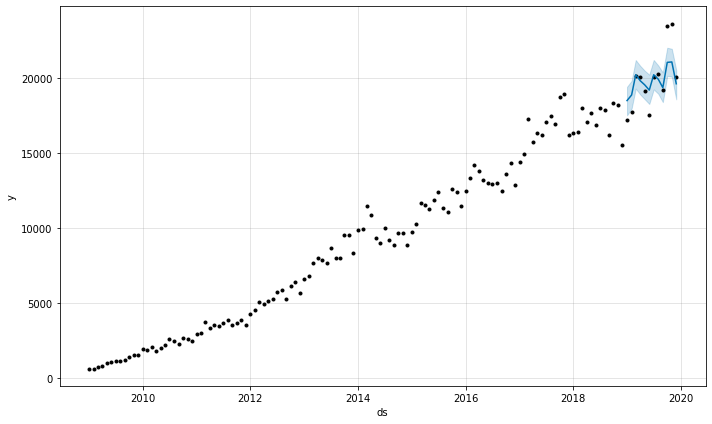

In [14]:
import matplotlib.pyplot as plt

# 파란색 선이 예측한 값
model.plot(forecast)
plt.show()

# 모델 평가하기

In [15]:
# 마지막 1년치 데이터 예측하기
train = df.drop(df.index[-12:])
y_true = df['y'][-12:].values  # 실제값

# 모델에 학습
model = Prophet()
model.fit(train)

last_1year = list()
for i in range(1,13):
  last_1year.append(['2019-%01d' % i])
last_1year = pd.DataFrame(last_1year, columns = ['ds'])
last_1year['ds']= pd.to_datetime(last_1year['ds'])

forecast = model.predict(last_1year)
y_pred = forecast['yhat'].values

from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_true, y_pred)
print('MAE: %.3f' % mae)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


MAE: 1065.401


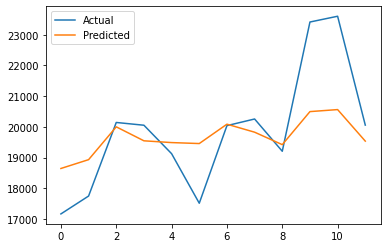

In [16]:
plt.plot(y_true, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.show()

In [17]:
df = train1[['month', 'numpy']]
df.columns = ['ds', 'y']
df['ds'] = pd.to_datetime(df['ds'], format='%y-%b')

from fbprophet import Prophet
model = Prophet()
model.fit(df)

train = df.drop(df.index[-12:])
y_true = df['y'][-12:].values

model = Prophet()
model.fit(train)

last_1year = list()
for i in range(1,13):
  last_1year.append(['2019-%01d' % i])
last_1year = pd.DataFrame(last_1year, columns = ['ds'])
last_1year['ds']= pd.to_datetime(last_1year['ds'])

forecast = model.predict(last_1year)
y_pred = forecast['yhat'].values

from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_true, y_pred)
print('MAE: %.3f' % mae)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


MAE: 101.493


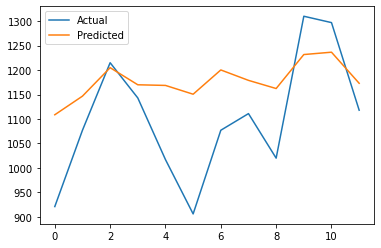

In [18]:
plt.plot(y_true, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.show()

In [19]:
df = train1[['month', 'r']]
df.columns = ['ds', 'y']
df['ds'] = pd.to_datetime(df['ds'], format='%y-%b')

from fbprophet import Prophet
model = Prophet()
model.fit(df)

train = df.drop(df.index[-12:])
y_true = df['y'][-12:].values

model = Prophet()
model.fit(train)

last_1year = list()
for i in range(1,13):
  last_1year.append(['2019-%01d' % i])
last_1year = pd.DataFrame(last_1year, columns = ['ds'])
last_1year['ds']= pd.to_datetime(last_1year['ds'])

forecast = model.predict(last_1year)
y_pred = forecast['yhat'].values

from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_true, y_pred)
print('MAE: %.3f' % mae)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


MAE: 530.260


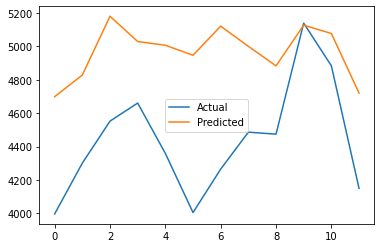

In [20]:
plt.plot(y_true, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.show()